In [105]:
import pandas as pd

data= pd.read_csv("Drug_overdose_death_rates__by_drug_type__sex__age__race__and_Hispanic_origin__United_States.csv")

In [106]:
import altair as alt

filtered_data = data[(data['AGE'] == 'All ages') & (data['STUB_LABEL'] == 'All persons') & (data['STUB_NAME'] == 'Total')]

panel_mapping = {'Drug overdose deaths involving other synthetic opioids (other than methadone)': 'Synthetic opioids other than methadone', 
                 'Drug overdose deaths involving any opioid': 'Any opioid', 
                 'Drug overdose deaths involving heroin': 'Heroin', 
                 'Drug overdose deaths involving methadone': 'Methadone',
                 'Drug overdose deaths involving natural and semisynthetic opioids': 'Natural and semisynthetic opioids'}

agg_data = filtered_data.groupby(['YEAR', 'PANEL']).agg({'ESTIMATE': 'mean'}).reset_index()
agg_data['PANEL'] = agg_data['PANEL'].replace(panel_mapping)

line_chart = alt.Chart(agg_data).mark_line().encode(
     x=alt.X('YEAR:O', axis=alt.Axis(title='Year')),
    y=alt.Y('ESTIMATE:Q', axis=alt.Axis(title='Deaths per 100,000')),
        color=alt.Color('PANEL:N', legend=alt.Legend(title='Panel Element', titleLimit=600, orient='right', columns=1, labelLimit=0))  # Adjust titleLimit, orient, and columns,
).properties(
    title='Death Rates per 100,000 by Year (1999-2018) Based on Type of Overdose',
    width=500  
)
line_chart

alt.Chart(...)

In [107]:
filtered_data2 = data[(data['AGE'] == 'All ages') & (data['STUB_NAME'] == 'Sex') & (data['YEAR'] == 2018)]

panel_mapping = {'Drug overdose deaths involving other synthetic opioids (other than methadone)': 'Synthetic opioids other than methadone', 
                 'Drug overdose deaths involving any opioid': 'Any opioid', 
                 'Drug overdose deaths involving heroin': 'Heroin', 
                 'Drug overdose deaths involving methadone': 'Methadone',
                 'Drug overdose deaths involving natural and semisynthetic opioids': 'Natural and semisynthetic opioids'}

agg_data2 = filtered_data2.groupby(['YEAR', 'PANEL', 'STUB_LABEL']).agg({'ESTIMATE': 'mean'}).reset_index()

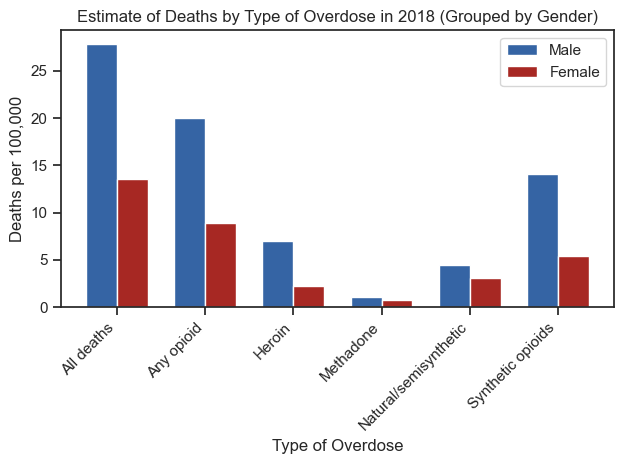

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Panel mapping
panel_mapping = {'All drug overdose deaths' : 'All deaths',
                 'Drug overdose deaths involving other synthetic opioids (other than methadone)': 'Synthetic opioids', 
                 'Drug overdose deaths involving any opioid': 'Any opioid', 
                 'Drug overdose deaths involving heroin': 'Heroin', 
                 'Drug overdose deaths involving methadone': 'Methadone',
                 'Drug overdose deaths involving natural and semisynthetic opioids': 'Natural/semisynthetic'}

agg_data2['PANEL'] = agg_data2['PANEL'].replace(panel_mapping)

# Filter data for the year 2018
agg_data_2018 = agg_data2[agg_data2['YEAR'] == 2018]

# Group by 'STUB_LABEL' and 'PANEL' for 'Male' and 'Female'
agg_data2_sex = agg_data2.groupby(['STUB_LABEL', 'PANEL']).agg({'ESTIMATE': 'mean'}).reset_index()

# Separate data for Male and Female
agg_data2_male = agg_data2_sex[agg_data2_sex['STUB_LABEL'] == 'Male']
agg_data2_female = agg_data2_sex[agg_data2_sex['STUB_LABEL'] == 'Female']

# Grouped bar chart
fig, ax = plt.subplots()
bar_width = 0.35
x_male = np.arange(len(agg_data2_male['PANEL']))
x_female = x_male + bar_width 


bar1 = ax.bar(x_male, agg_data2_male['ESTIMATE'], width=bar_width, label='Male', color='#3564A4')
bar2 = ax.bar(x_female, agg_data2_female['ESTIMATE'], width=bar_width, label='Female', color='#A72823')

# Labeling
ax.set_xlabel('Type of Overdose')
ax.set_ylabel('Deaths per 100,000')
ax.set_title('Estimate of Deaths by Type of Overdose in 2018 (Grouped by Gender)')
ax.set_xticks(x_male + bar_width/2)
ax.set_xticklabels(agg_data2_male['PANEL'], rotation=45, ha='right') 
ax.legend()

# Show the grouped bar chart
plt.tight_layout()
plt.show()


In [122]:
data = pd.read_csv("Drug_overdose_death_rates__by_drug_type__sex__age__race__and_Hispanic_origin__United_States.csv")

filtered_data = data[(data['YEAR'] == 2018) & (data['STUB_NAME'] == 'Age')]

panel_mapping = {'Drug overdose deaths involving other synthetic opioids (other than methadone)': 'Synthetic opioids other than methadone', 
                 'Drug overdose deaths involving any opioid': 'Any opioid', 
                 'Drug overdose deaths involving heroin': 'Heroin', 
                 'Drug overdose deaths involving methadone': 'Methadone',
                 'Drug overdose deaths involving natural and semisynthetic opioids': 'Natural and semisynthetic opioids'}


filtered_data.loc[:, 'PANEL'] = filtered_data['PANEL'].replace(panel_mapping)

In [123]:
import plotly.graph_objects as go
import plotly.express as px

#df = px.data.gapminder()

fig = px.scatter(x= filtered_data['STUB_LABEL'], y=filtered_data['ESTIMATE'],
	             color=filtered_data["PANEL"])
fig.show()